In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df_ecom = pd.read_csv('Ecommerce - UK Retailer.csv', encoding= 'unicode_escape')

In [3]:
# Checking the dataset

df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# Checking the shape of the dataset.

df_ecom.shape

(541909, 8)

    There are 541909 records and 8 columns in the dataset including the target variable.

In [5]:
# Cheking the basic information of the variables of the dataset.

df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### 1. Perform Basic EDA 

#### a. Boxplot – All Numeric Variables 

In [6]:
# Creating a df of all the numeric columns i.e. 'Quantity' and 'UnitPrice'. 
# 'CustomerID' is not included in this df because customer id is unique and thus will not conttribute much.

num_col = df_ecom.select_dtypes(exclude = object)

num_col.head()

,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0


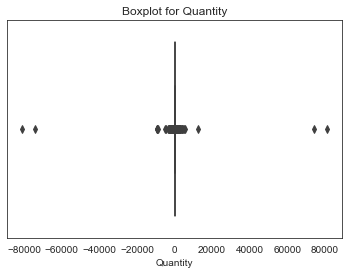

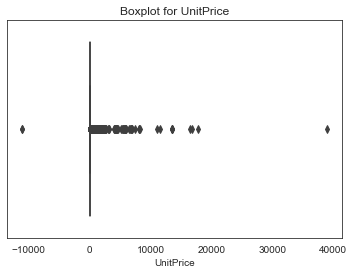

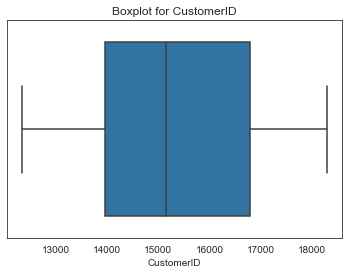

In [7]:
# Visualizing the boxplot of numeric columns.

sns.set_style('white')
for i in num_col.columns:
    plt.title(f'Boxplot for {i}')
    sns.boxplot(i, data = df_ecom)
    plt.show()

#### b. Histogram – All Numeric Variables 

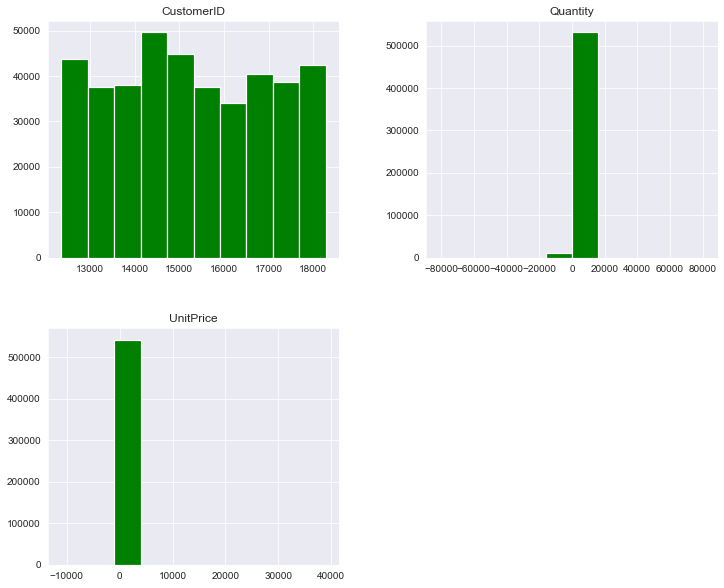

In [8]:
# Visualizing the histogram of the numeric columns.

sns.set_style('dark')
num_col.hist(edgecolor = 'white', linewidth = 1.2, color = 'g')
fig = plt.gcf()
fig.set_size_inches(12,10)

#### c. Distribution Plot – All Numeric Variables

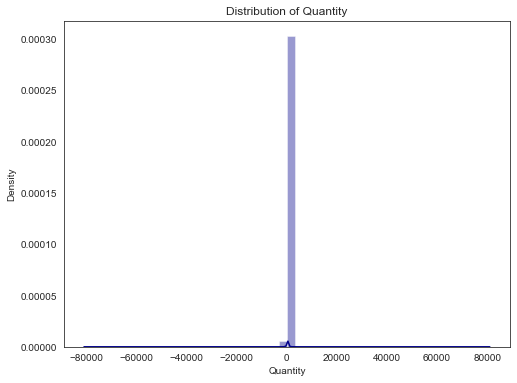

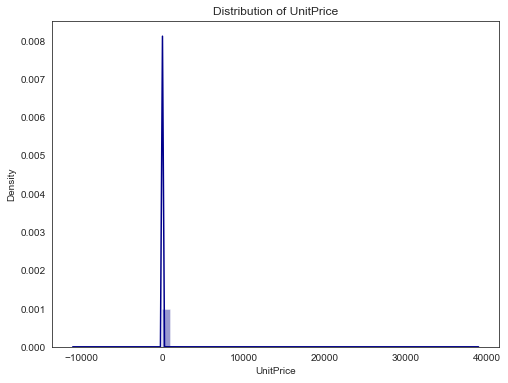

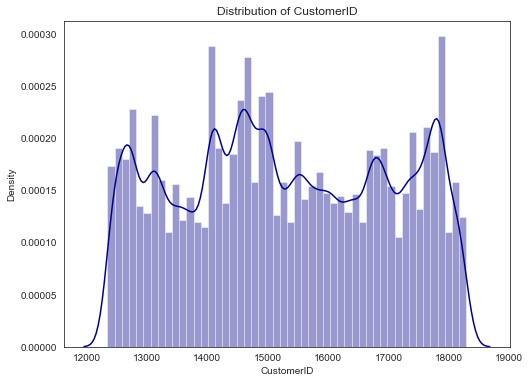

In [9]:
# Visualizing the distribution of the numeric columns.

sns.set_style('white')
for i in num_col.columns:
    plt.figure(figsize = (8,6))
    plt.title(f'Distribution of {i}')
    sns.distplot(df_ecom[i], color = 'darkblue')
    plt.show()

#### d. Aggregation for all numerical Columns

In [10]:
# Getting the aggreagtion values of the numeric columns.

df_ecom.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


    The above table summarizes the aggregations of the numeric variables.
        count - Total number of values
        mean - Average of the variable
        std - Standard deviation of the variable
        min - Minimum value of the variable
        max - Maximum value of the variable
        25% - Quartile 1 which shows the values less than or equals to 25% of the data.
        50% - Quartile 2 which shows the values less than or equals to 50% of the data, i.e. median.
        75% - Quartile 3 which shows the values less than or equals to 75% of the data.

In [11]:
# Getting other aggregation values of the numeric varaibles like sum().

num_col.sum()

Quantity      5.176450e+06
UnitPrice     2.498804e+06
CustomerID    6.219476e+09
dtype: float64

#### e. Unique Values across all columns 

In [12]:
# Getting all the unique values.

for i in df_ecom.columns:
    val_count = df_ecom[i].value_counts()
    val_per = df_ecom[i].value_counts(normalize = True)
    unique_val = pd.concat([val_count, val_per], axis = 1)
    print(f'----- Unique Values of {i} -----\n\n{unique_val}\n\n')

----- Unique Values of InvoiceNo -----

         InvoiceNo  InvoiceNo
573585        1114   0.002056
581219         749   0.001382
581492         731   0.001349
580729         721   0.001330
558475         705   0.001301
...            ...        ...
547505           1   0.000002
550502           1   0.000002
C562911          1   0.000002
570403           1   0.000002
579450           1   0.000002

[25900 rows x 2 columns]


----- Unique Values of StockCode -----

        StockCode  StockCode
85123A       2313   0.004268
22423        2203   0.004065
85099B       2159   0.003984
47566        1727   0.003187
20725        1639   0.003024
...           ...        ...
35991           1   0.000002
84455           1   0.000002
84612B          1   0.000002
23059           1   0.000002
90000C          1   0.000002

[4070 rows x 2 columns]


----- Unique Values of Description -----

                                    Description  Description
WHITE HANGING HEART T-LIGHT HOLDER         2369     0.

#### f. Duplicate values across all columns 

In [7]:
# Checking duplicate values of each column

dup_data = df_ecom[df_ecom.duplicated()]
dup_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


    There are 5268 duplicate rows in the dataset.

#### g. Correlation – Heatmap - All Numeric Variables

<AxesSubplot:>

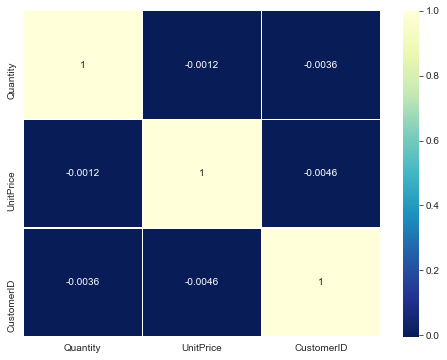

In [14]:
# Visualizing the correlation using  heatmap.

plt.figure(figsize = (8,6))
sns.heatmap(df_ecom.corr(), annot = True, cmap = 'YlGnBu_r', linewidths = .2)

#### h. Regression Plot - All Numeric Variables 

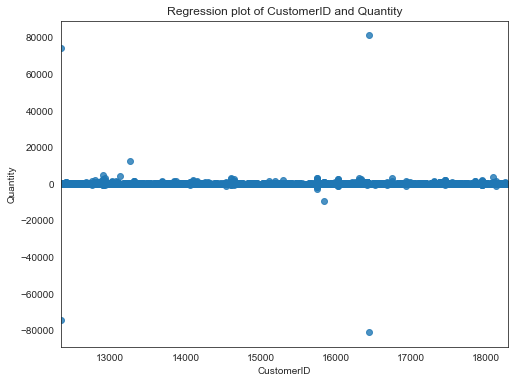

In [15]:
# Visualising regression plot showing the relation between 'CustomerID' and 'Quantity'.

plt.figure(figsize=(8,6))
sns.regplot(x = 'CustomerID', y = 'Quantity', data = df_ecom)
plt.title('Regression plot of CustomerID and Quantity')
plt.show()

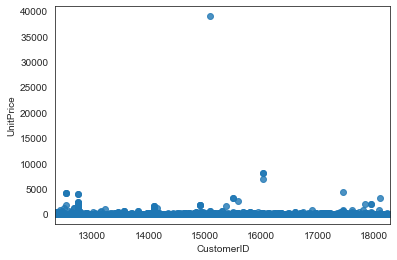

In [16]:
# Visualising regression plot showing the relation between 'CustomerID' and 'UnitPrice'.

sns.regplot(x = 'CustomerID', y = 'UnitPrice', data = df_ecom)
plt.show()

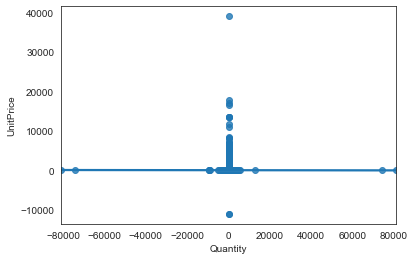

In [17]:
# Visualising regression plot showing the relation between 'Quantity' and 'UnitPrice'.

sns.regplot(x = 'Quantity', y = 'UnitPrice', data = df_ecom)
plt.show()

#### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

In [ ]:
fig,ax = plt.subplots(5,3)

sns.barplot(x = "InvoiceNo", y = "Quantity", data = df_ecom, ax = ax[0,0]) 
sns.barplot(x = "InvoiceNo", y = "UnitPrice", data = df_ecom, ax = ax[0,1]) 
sns.barplot(x = "InvoiceNo", y = "CustomerID",data = df_ecom, ax = ax[0,2]) 

sns.barplot(x = "StockCode", y = "Quantity", data = df_ecom, ax = ax[1,0]) 
sns.barplot(x = "StockCode", y = "UnitPrice", data = df_ecom, ax = ax[1,1]) 
sns.barplot(x = "StockCode", y = "CustomerID",data = df_ecom, ax = ax[1,2])

sns.barplot(x = "Description", y = "Quantity", data = df_ecom, ax = ax[2,0]) 
sns.barplot(x = "Description", y = "UnitPrice", data = df_ecom, ax = ax[2,1]) 
sns.barplot(x = "Description", y = "CustomerID",data = df_ecom, ax = ax[2,2])

sns.barplot(x = "InvoiceDate", y = "Quantity", data = df_ecom, ax = ax[3,0]) 
sns.barplot(x = "InvoiceDate", y = "UnitPrice", data = df_ecom, ax = ax[3,1]) 
sns.barplot(x = "InvoiceDate", y = "CustomerID",data = df_ecom, ax = ax[3,2])

sns.barplot(x = "Country", y = "Quantity", data = df_ecom, ax = ax[4,0]) 
sns.barplot(x = "Country", y = "UnitPrice", data = df_ecom, ax = ax[4,1]) 
sns.barplot(x = "Country", y = "CustomerID",data = df_ecom, ax = ax[4,2])

plt.show()

#### j. Pair plot - All Numeric Variables 

In [ ]:
sns.pairplot(num_col)
plt.show()

#### k. Line chart to show the trend of data - All Numeric/Date Variables

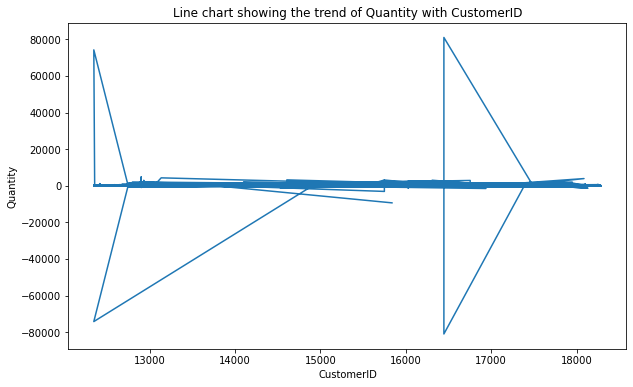

In [5]:
# Visualising the trend between CustomerID and Quantity

plt.figure(figsize=(10,6))
plt.plot(df_ecom['CustomerID'], df_ecom['Quantity'])
plt.title('Line chart showing the trend of Quantity with CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.show()

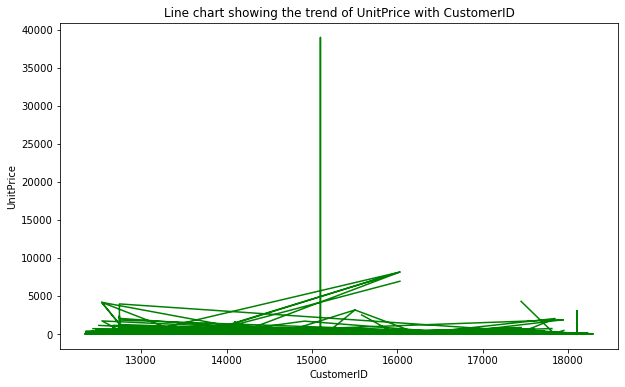

In [6]:
# Visualising the trend between CustomerID and UnitPrice

plt.figure(figsize=(10,6))
plt.plot(df_ecom['CustomerID'], df_ecom['UnitPrice'], color = 'g')
plt.title('Line chart showing the trend of UnitPrice with CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('UnitPrice')
plt.show()

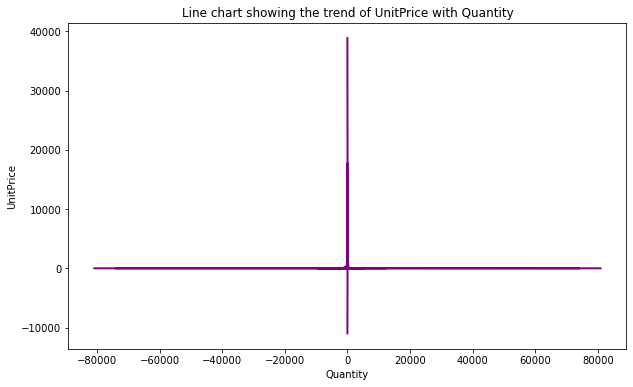

In [7]:
# Visualising the trend between CustomerID and UnitPrice

plt.figure(figsize=(10,6))
plt.plot(df_ecom['Quantity'], df_ecom['UnitPrice'], color = 'purple')
plt.title('Line chart showing the trend of UnitPrice with Quantity')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

#### l. Plot the skewness - All Numeric Variables 

In [8]:
# Checking the skewness value of numeric columns

num_col.skew()

Quantity       -0.264076
UnitPrice     186.506972
CustomerID      0.029835
dtype: float64

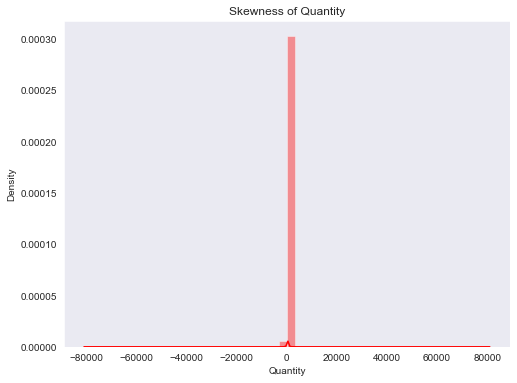

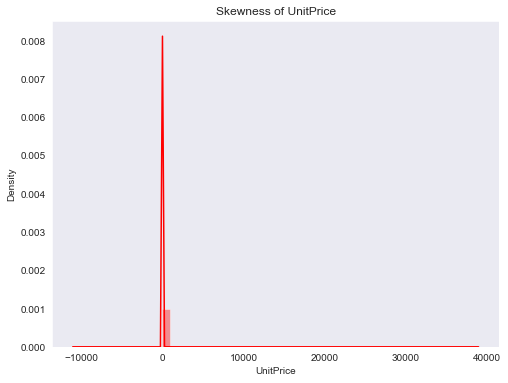

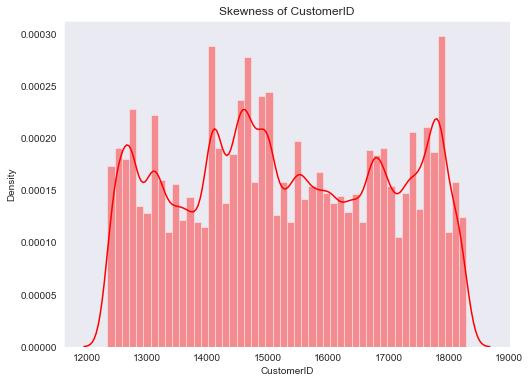

In [17]:
# Visualising the skewness of numeric variables using distribution plot.

sns.set_style('dark')
for i in num_col.columns:
    plt.figure(figsize = (8,6))
    plt.title(f'Skewness of {i}')
    sns.distplot(df_ecom[i], color = 'red')
    plt.show()

### 2. Check for missing values in all columns and replace them with the appropriate metric (Mean/Median/Mode) 

In [9]:
# Checking the missing values

df_ecom.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

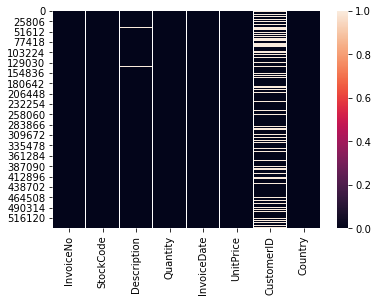

In [10]:
# Visualizing the missing vauesusing heatmap

sns.heatmap(df_ecom.isnull())
plt.show()

    There are lot of missing values in 'CustomerID' followed by 'Description'.

**Handling missing values**

*CustomerID*

In [11]:
# CustomerID - every customer has it's unique id, also, there are no outliers present in this variable. 
# So, inorder to fill the misisng values -- Median is used here as a metric 
# because we can take the average of unique id's alloted to a customer.

cust_median = df_ecom['CustomerID'].median()
cust_median

15152.0

In [12]:
# Filling the null values

df_ecom['CustomerID'] = df_ecom['CustomerID'].fillna(cust_median)

*Description*

In [13]:
# Description - is in string dtatype.
# Filling the null values in this variable by introducing a new value - no description

df_ecom['Description'] = df_ecom['Description'].fillna('no_description')

In [14]:
# CHceking the null values again after handling the same.

df_ecom.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

    All the null values have been treated.

### 3. Remove duplicate rows

In [15]:
# Dropping all the duplicated rows from the dataset.

df_ecom.drop_duplicates(inplace = True)

In [16]:
# Chceking the no.of rows after droping the duplicate values.

print(f'Total number of rows : {df_ecom.shape[0]}')

Total number of rows : 536641


### 4. Remove rows which have negative values in Quantity column 

In [17]:
# Chceking the data of negative values in column 'Quantity'.

neg_data = df_ecom[df_ecom['Quantity'] < 0]
neg_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


    There are 10587 rows having negative values in variable 'Quantity'

In [18]:
# Droping the rows having negative values.

df_ecom.drop(neg_data.index, inplace = True)

In [19]:
# Chceking the no.of rows after droping the duplicate values.

print(f'Total number of rows : {df_ecom.shape[0]}')

Total number of rows : 526054


### 5. Add the columns - Month, Day and Hour for the invoice

In [20]:
# Converting the data type of 'InvoiceDate' and extracting the month, day and hour of the InvoiceDate.

df_ecom['Invoice_month'] = pd.to_datetime(df_ecom.InvoiceDate, format = '%m/%d/%Y %H:%M').dt.month
df_ecom['Invoice_day'] = pd.to_datetime(df_ecom.InvoiceDate, format = '%m/%d/%Y %H:%M').dt.day
df_ecom['Invoice_hour'] = pd.to_datetime(df_ecom.InvoiceDate, format = '%m/%d/%Y %H:%M').dt.hour

df_ecom['Year_month'] = pd.to_datetime(df_ecom.InvoiceDate).map(lambda x: 100*x.year + x.month)
df_ecom['day_of_week'] = pd.to_datetime(df_ecom.InvoiceDate, format = '%m/%d/%Y %H:%M').dt.dayofweek

In [21]:
# Chceking the dataset after adding 3 columns

df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Invoice_day,Invoice_hour,Year_month,day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8,201012,2
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8,201012,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2


### 6. How many orders made by the customers? 

In [22]:
# checking the no. of orders as per invoiceno is made by customers from different countries

cust_orders = df_ecom.groupby(by=['CustomerID','Country'], as_index = False)['InvoiceNo'].count()
cust_orders

,CustomerID,Country,InvoiceNo
0,12346.0,United Kingdom,1
1,12347.0,Iceland,182
2,12348.0,Finland,31
3,12349.0,Italy,73
4,12350.0,Norway,17
...,...,...,...
4350,18280.0,United Kingdom,10
4351,18281.0,United Kingdom,7
4352,18282.0,United Kingdom,12
4353,18283.0,United Kingdom,721


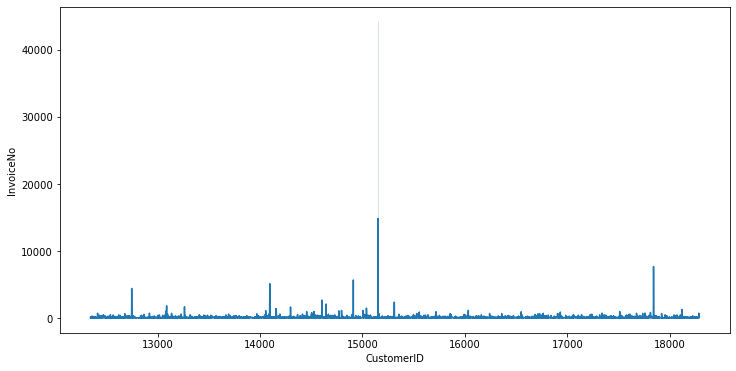

In [23]:
# Visualizing the orders made by customers

plt.figure(figsize=(12,6))
sns.lineplot(x = 'CustomerID', y = 'InvoiceNo', data = cust_orders)
plt.show()

### 7. TOP 5 customers with higher number of orders 

In [24]:
# TOP 5 customers

cust_orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
2073,15152.0,United Kingdom,132187
4027,17841.0,United Kingdom,7676
1888,14911.0,EIRE,5672
1298,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4413


### 8. How much money spent by the customers? 

In [25]:
# first we need to add a column which shows the amount spent by each record

df_ecom['Amount_spent'] = df_ecom['Quantity']*df_ecom['UnitPrice']
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Invoice_day,Invoice_hour,Year_month,day_of_week,Amount_spent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,12,1,8,201012,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,12,1,8,201012,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,12,1,8,201012,2,20.34


In [26]:
# NOw how much money is spent by the customers can be calculated'

cust_amt_spent = df_ecom.groupby(by=['CustomerID','Country'], as_index = False)['Amount_spent'].sum()
cust_amt_spent

,CustomerID,Country,Amount_spent
0,12346.0,United Kingdom,77183.60
1,12347.0,Iceland,4310.00
2,12348.0,Finland,1797.24
3,12349.0,Italy,1757.55
4,12350.0,Norway,334.40
...,...,...,...
4350,18280.0,United Kingdom,180.60
4351,18281.0,United Kingdom,80.82
4352,18282.0,United Kingdom,178.05
4353,18283.0,United Kingdom,2045.53


### 9. TOP 5 customers with highest money spent 

In [27]:
# Getting TOP 5 customers who have spent a large amount. 

cust_amt_spent.sort_values(by = 'Amount_spent', ascending = False).head()

,CustomerID,Country,Amount_spent
2073,15152.0,United Kingdom,1.699341e+06
1698,14646.0,Netherlands,2.802060e+05
4218,18102.0,United Kingdom,2.596573e+05
3745,17450.0,United Kingdom,1.943908e+05
3025,16446.0,United Kingdom,1.684725e+05


### 10. How many orders per month?

In [28]:
# Getting orders per month

orders_per_month = df_ecom.groupby('Year_month')['InvoiceNo'].count().sort_values()
orders_per_month

Year_month
201112    24857
201102    26961
201104    28957
201101    34104
201108    34347
201103    35609
201106    35793
201105    36044
201107    38466
201012    41192
201109    48962
201110    58629
201111    82133
Name: InvoiceNo, dtype: int64

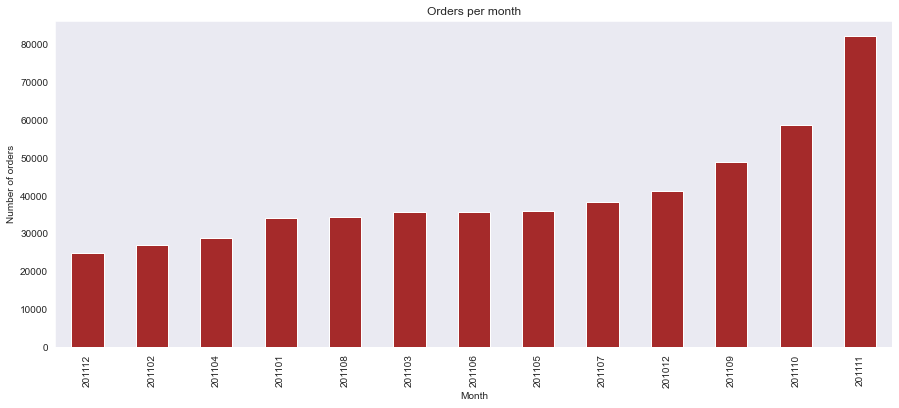

In [29]:
# Visualising the orders per month

sns.set_style('dark')
orders_per_month.plot(kind = 'bar', figsize=(15,6), color = 'brown')
plt.title('Orders per month')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.show()

### 11. How many orders per day? 

In [30]:
# Getting orders per day

orders_per_day = df_ecom.groupby('day_of_week')['InvoiceNo'].count().sort_values()
orders_per_day

day_of_week
6     62344
4     79869
2     91710
0     92638
1     99066
3    100427
Name: InvoiceNo, dtype: int64

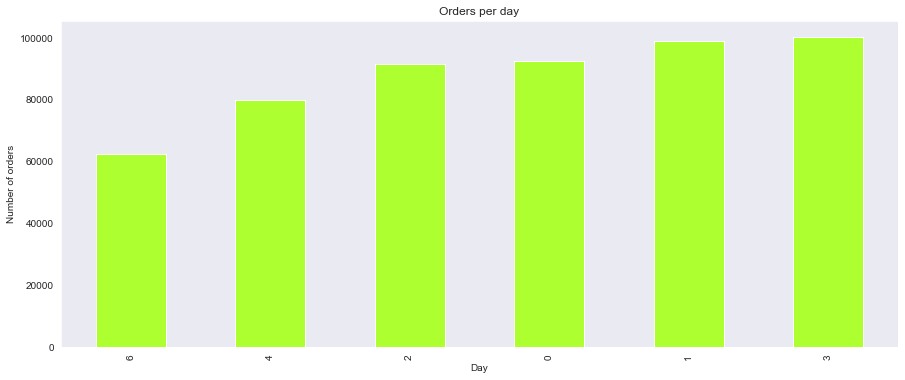

In [31]:
# Visualising the orders per day

orders_per_day.plot(kind = 'bar', figsize=(15,6), color = 'greenyellow')
plt.title('Orders per day')
plt.xlabel('Day')
plt.ylabel('Number of orders')
plt.show()

### 12. How many orders per hour? 

In [32]:
# Getting orders per hour

orders_per_hour = df_ecom.groupby('Invoice_hour')['InvoiceNo'].count().sort_values()
orders_per_hour

Invoice_hour
6         1
7       379
20      778
19     3428
18     7696
8      8802
17    27498
9     33738
10    47670
16    53074
11    55592
14    65384
13    70067
15    75851
12    76096
Name: InvoiceNo, dtype: int64

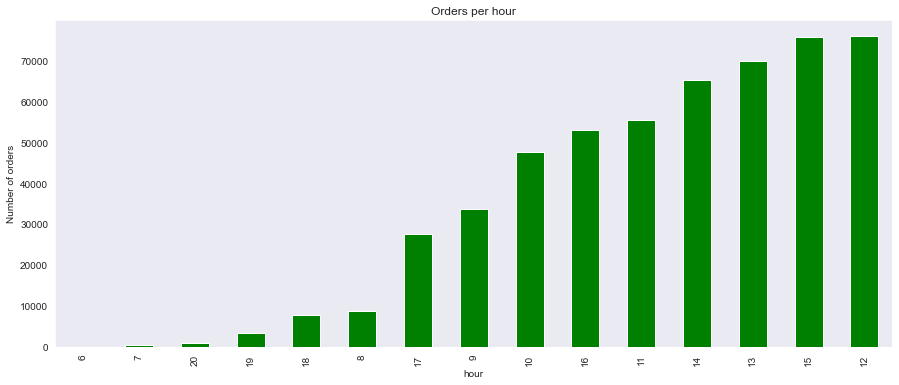

In [33]:
# Visualising the orders per hour

orders_per_hour.plot(kind = 'bar', figsize=(15,6), color = 'green')
plt.title('Orders per hour')
plt.xlabel('hour')
plt.ylabel('Number of orders')
plt.show()

### 13. How many orders for each country? 

In [34]:
# Getting orders for each country 

orders_per_hour = df_ecom.groupby('Country')['InvoiceNo'].count().sort_values()
orders_per_hour

Country
Saudi Arabia                 9
Bahrain                     18
Czech Republic              25
Brazil                      32
Lithuania                   35
Lebanon                     45
RSA                         58
European Community          60
United Arab Emirates        68
Malta                      112
Greece                     145
Canada                     151
USA                        179
Iceland                    182
Singapore                  222
Hong Kong                  280
Israel                     292
Japan                      321
Poland                     330
Denmark                    380
Austria                    398
Unspecified                442
Sweden                     450
Cyprus                     603
Finland                    685
Channel Islands            747
Italy                      758
Norway                    1072
Australia                 1184
Portugal                  1492
Switzerland               1959
Belgium                   2031


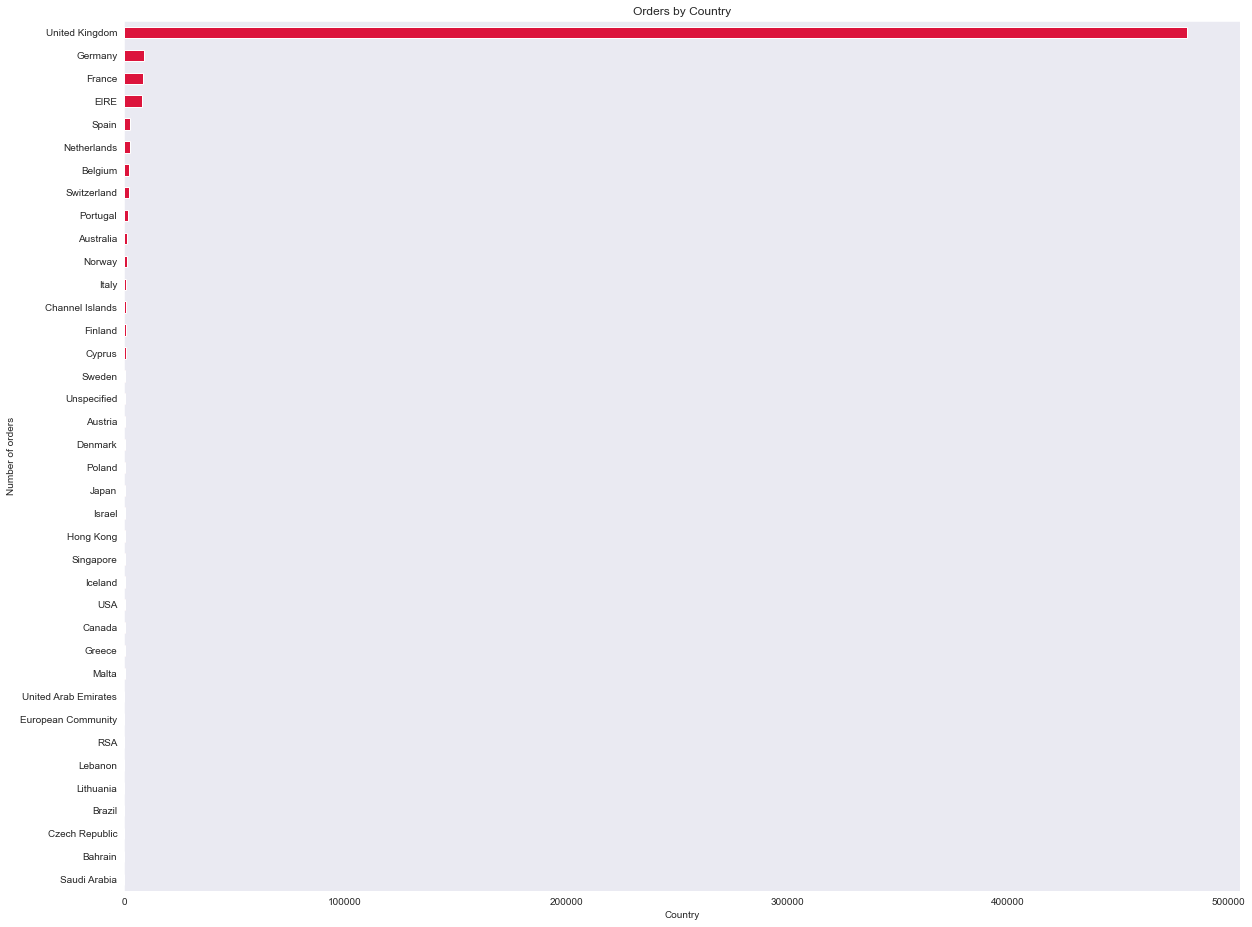

In [35]:
# Visualising the orders by country

orders_per_hour.plot(kind = 'barh', figsize=(20,16), color = 'crimson')
plt.title('Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of orders')
plt.show()

### 14. Orders trend across months 

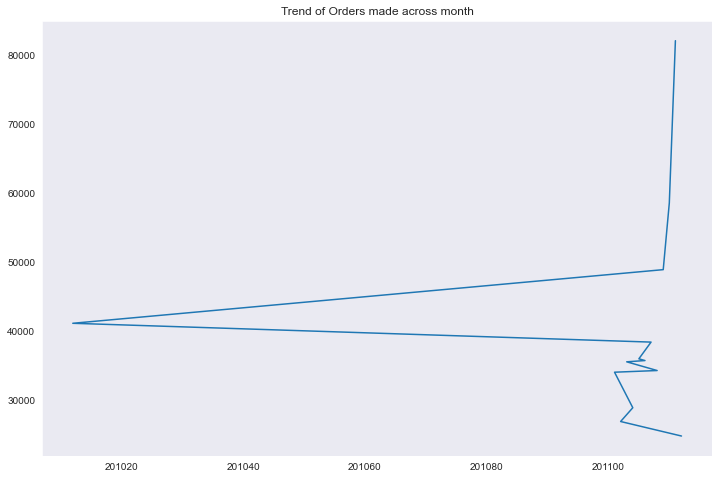

In [79]:
plt.figure(figsize=(12,8))
plt.plot(orders_per_month)
plt.title('Trend of Orders made across month')
plt.show()

### 15. How much money spent by each country?

In [73]:
# Amount Spent by countries

amt_by_country = df_ecom.groupby('Country')['Amount_spent'].sum().sort_values()
amt_by_country

Country
Saudi Arabia            1.459200e+02
Bahrain                 7.541400e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Unspecified             4.740940e+03
Greece                  4.760520e+03
Poland                  7.334650e+03
Israel                  8.129410e+03
Austria                 1.019868e+04
Cyprus                  1.350285e+04
Hong Kong               1.548300e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.044054e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.368305e+04
Norway                  3.6165

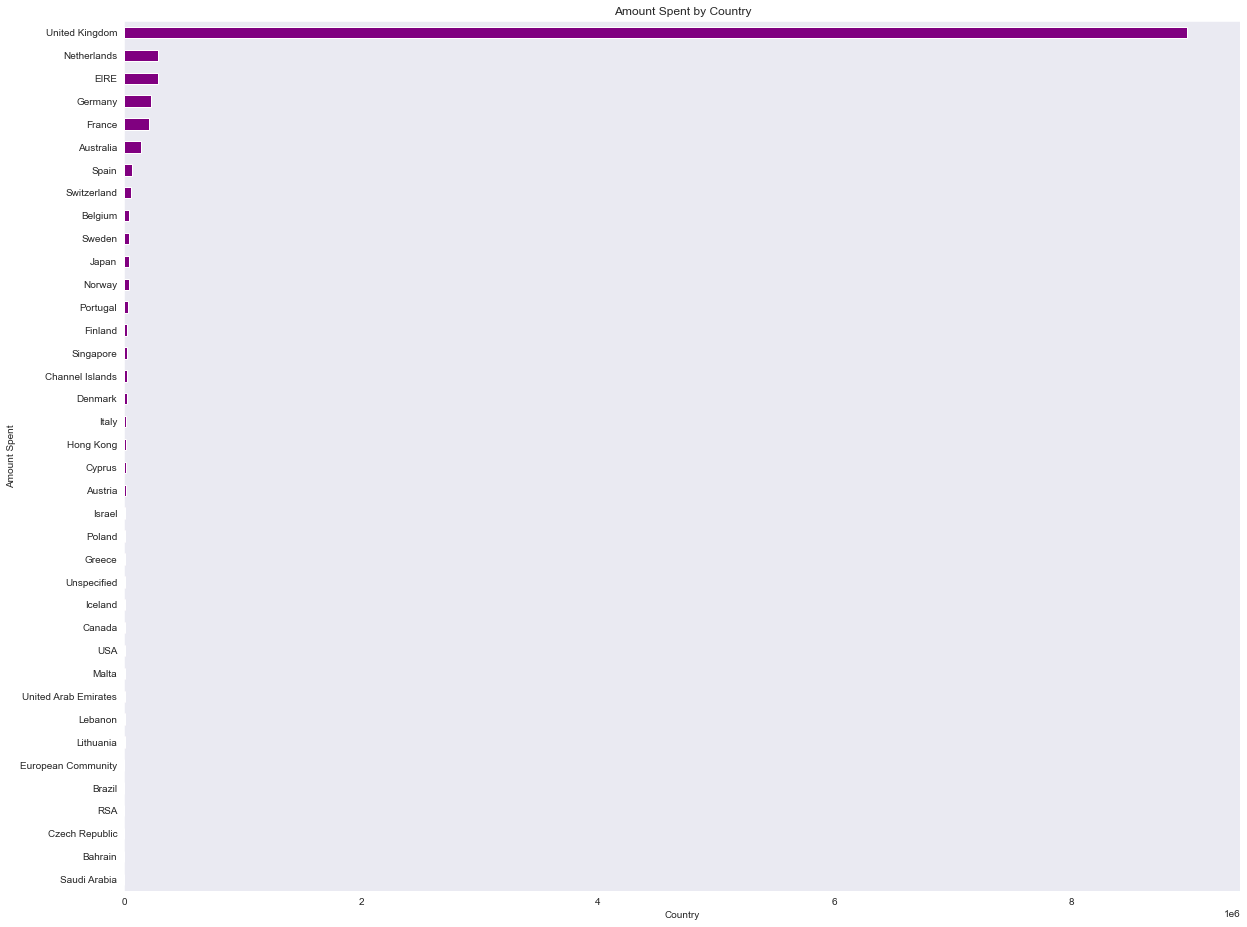

In [75]:
# Visualising the above data using barh

amt_by_country.plot(kind = 'barh', figsize=(20,16), color = 'purple')
plt.title('Amount Spent by Country')
plt.xlabel('Country')
plt.ylabel('Amount Spent')
plt.show()